In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [88]:
df = pd.read_excel("test.xlsx", sheet_name="Arkusz1")
df = pd.read_excel("test.xlsx")
df = df[['Year', 'Married', 'Income', "Mean age", "Household"]]

In [89]:
df

,Year,Married,Income,Mean age,Household
0,2022,136297,42330,29.15,131202
1,2021,135704,40860,29.45,129224
2,2020,137772,38760,29.30,128451
3,2019,137758,35700,28.90,128579
4,2018,136506,34640,28.80,127586
5,2017,135749,34060,28.45,126224
6,2016,134145,32790,28.45,125819
7,2015,133564,31300,28.15,124587
8,2014,132585,29860,28.15,123229
9,2013,131656,29750,27.80,122459


In [90]:
df.describe()

,Year,Married,Income,Mean age,Household
count,23.00000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,130663.173913,29424.347826,27.493478,119526.086957
std,6.78233,4969.723969,5971.686853,1.174086,7576.810008
min,2000.00000,120211.000000,22130.000000,25.950000,104705.000000
25%,2005.50000,127473.000000,25355.000000,26.425000,113863.500000
50%,2011.00000,130767.000000,28070.000000,27.400000,119927.000000
75%,2016.50000,134924.500000,33425.000000,28.450000,126021.500000
max,2022.00000,137772.000000,42330.000000,29.450000,131202.000000


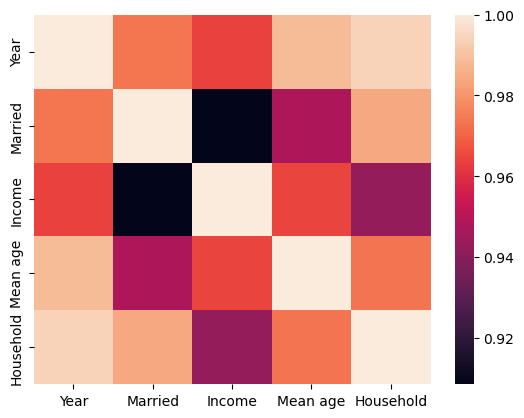

In [91]:
new = df.corr()
sns.heatmap(new)
plt.show()

In [92]:
def scale_correlation(x):
    a = 100 / 7
    b = -93 / 7
    return a * x + b

# Apply the scaling function to each element of the correlation matrix
scaled_corr_matrix = new.applymap(scale_correlation)

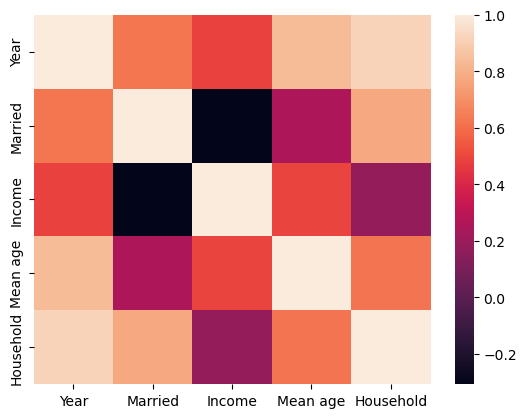

In [93]:
sns.heatmap(scaled_corr_matrix)
plt.show()

In [94]:
new

,Year,Married,Income,Mean age,Household
Year,1.000000,0.973903,0.964185,0.988373,0.993961
Married,0.973903,1.000000,0.908483,0.947680,0.984306
Income,0.964185,0.908483,1.000000,0.964535,0.942613
Mean age,0.988373,0.947680,0.964535,1.000000,0.973480
Household,0.993961,0.984306,0.942613,0.973480,1.000000


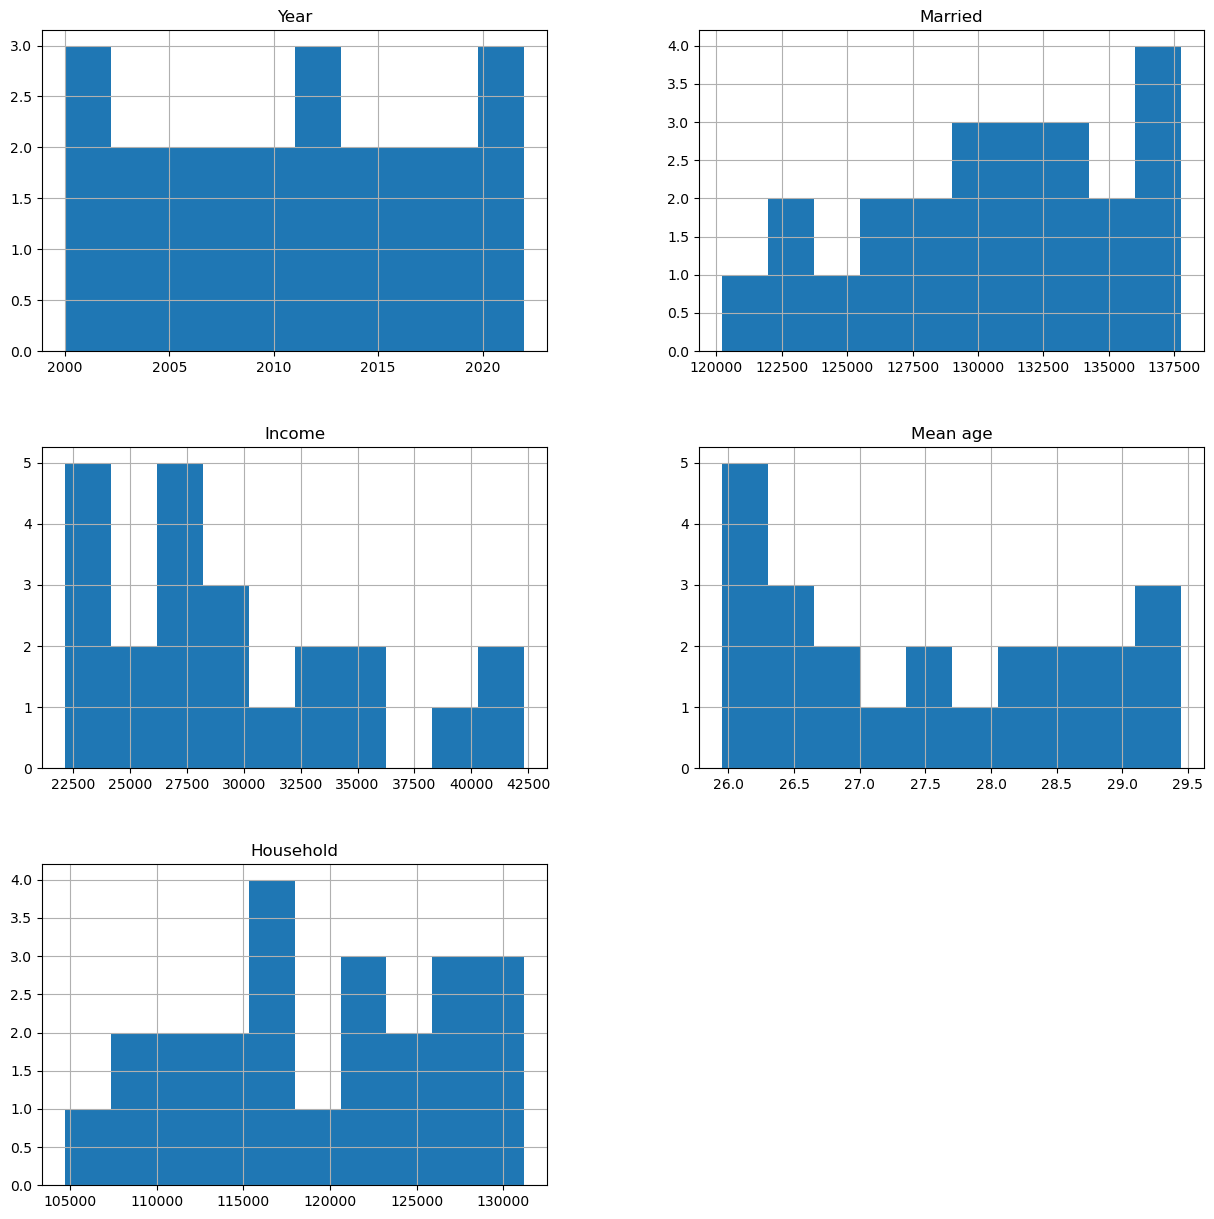

In [95]:

df.hist(figsize=(15,15), bins=10)
plt.show()

In [96]:
import warnings
import cmdstanpy
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Parameter testing

In [97]:

# sim

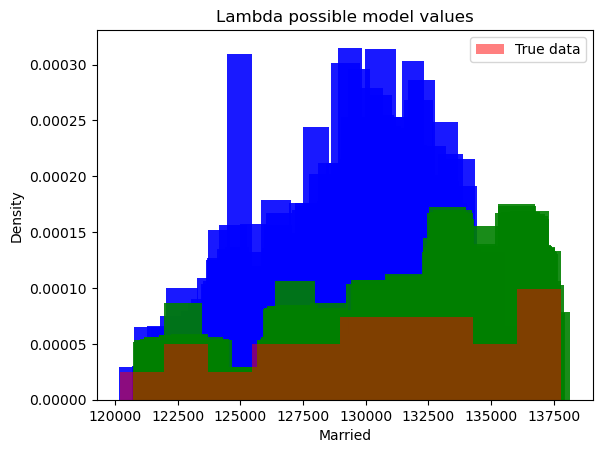

In [98]:
from numpy import random
alpha = 0.46
beta = 143000

sim = random.normal(-alpha*df['Income'] + beta, 1500, (100,23))

for i in range(len(sim)):
    plt.hist(sim[i], color='blue', alpha = 0.9, density=True)

sim = random.poisson(-alpha*1.7*df['Income'] + beta*1.08, (100,23))

for i in range(len(sim)):
    plt.hist(sim[i], color='green', alpha = 0.9, density=True)

plt.hist(df['Married'], color='red', alpha = 0.5, density=True, label='True data')
plt.title('Lambda possible model values')
plt.xlabel('Married')
plt.ylabel('Density')
plt.legend()
plt.show()

In [99]:
beta*1.08

154440.0

In [100]:
beta*1.08

154440.0

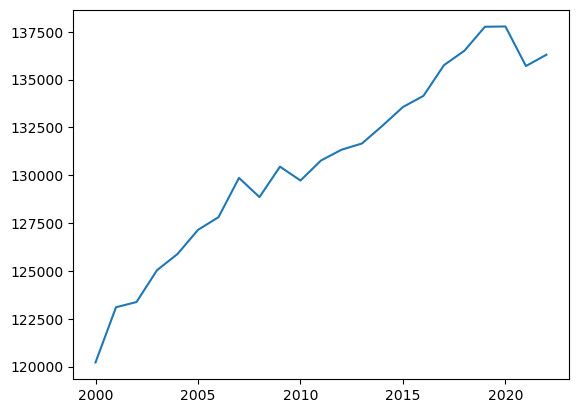

In [101]:
plt.plot(df['Year'], df['Married'])
plt.show()

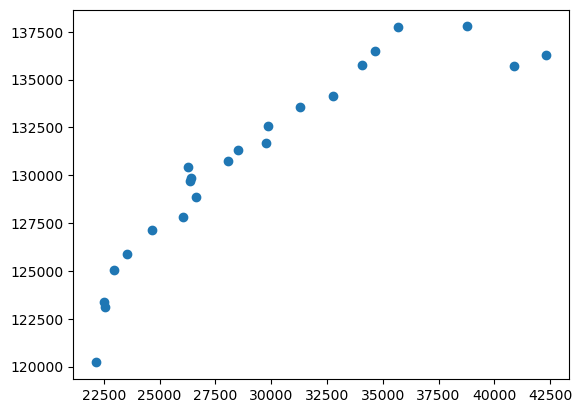

In [102]:
plt.scatter(df['Income'], df['Married'])
plt.show()

# Income na małżeństwa

In [103]:
model = CmdStanModel(stan_file='model_prior.stan')
#model = CmdStanModel(stan_file='model_adam_1_prior.stan')
N = 23
R = 30

In [104]:
data = {'N': N, 'income': df['Income']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

16:16:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


16:16:34 - cmdstanpy - INFO - CmdStan done processing.


In [105]:
gen_1.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,1.070820,109554.0,363.866,154928.0,152802.0,151149.0,148219.0,147472.0,...,137616.0,137834.0,137938.0,137412.0,136014.0,135005.0,134475.0,133593.0,133758.0,132630.0
1,0.0,0.0,0.809829,106701.0,1590.420,140754.0,139536.0,139106.0,136296.0,130240.0,...,129633.0,130100.0,131083.0,130237.0,127093.0,123574.0,124446.0,124514.0,126194.0,125076.0
2,0.0,0.0,0.864364,105602.0,996.610,142187.0,142131.0,139862.0,137197.0,136718.0,...,128875.0,129516.0,128967.0,127812.0,127285.0,125887.0,124128.0,125791.0,126865.0,124397.0
3,0.0,0.0,0.607914,108742.0,1057.900,133481.0,134707.0,132280.0,130836.0,129178.0,...,124403.0,125640.0,127625.0,124546.0,122787.0,122892.0,121698.0,122984.0,121361.0,122090.0
4,0.0,0.0,0.930442,107848.0,786.513,146338.0,144905.0,145026.0,140917.0,139953.0,...,132495.0,131401.0,131623.0,132956.0,130415.0,129485.0,128359.0,128612.0,128662.0,128799.0
5,0.0,0.0,0.714218,108885.0,1329.280,139767.0,136398.0,137889.0,135238.0,132172.0,...,126836.0,127809.0,127977.0,129808.0,124743.0,127717.0,125738.0,127580.0,125018.0,126013.0
6,0.0,0.0,0.844901,107920.0,1106.740,142598.0,142161.0,140107.0,139554.0,136457.0,...,128146.0,130592.0,129254.0,128404.0,129652.0,127468.0,128688.0,127286.0,127504.0,125477.0
7,0.0,0.0,0.822922,107323.0,1015.940,141497.0,141829.0,138931.0,137079.0,135693.0,...,128160.0,130126.0,129348.0,129629.0,128192.0,126860.0,126624.0,127321.0,125450.0,125047.0
8,0.0,0.0,0.889267,107042.0,1202.840,144256.0,142183.0,143520.0,137944.0,134707.0,...,131338.0,132824.0,131846.0,129996.0,128117.0,128731.0,128237.0,127649.0,128003.0,126520.0
9,0.0,0.0,0.868655,106537.0,1180.510,142791.0,142642.0,139991.0,136539.0,136356.0,...,130121.0,128797.0,128657.0,127923.0,129356.0,128850.0,128038.0,125245.0,126354.0,125598.0


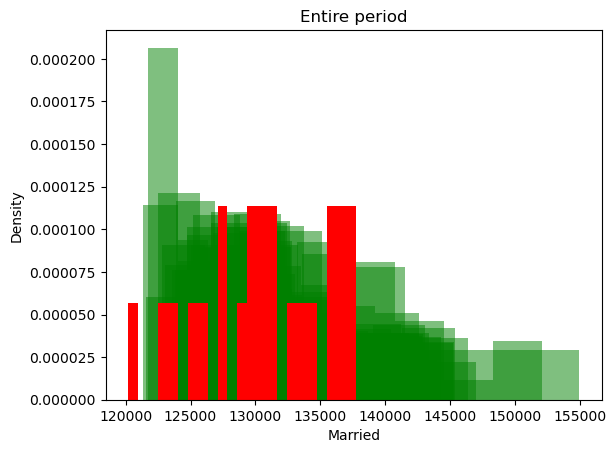

In [106]:
for i in range(R):
    plt.hist(gen_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)
plt.hist(df['Married'], bins=23, color='red', density=True)
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.show()

In [107]:
post_model = CmdStanModel(stan_file='model.stan')


In [108]:
data_post = {'N': N, 'y': df['Married'], 'income': df['Income']}
fit_1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

16:16:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


16:16:35 - cmdstanpy - INFO - CmdStan done processing.


In [109]:
fit_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22],log_lik[23]
0,-4844.27,0.780724,0.148705,3.0,15.0,0.0,4853.34,0.238843,123547.0,4859.84,...,-9.41595,-9.43095,-9.40770,-9.48926,-9.51946,-9.63715,-9.74636,-10.06180,-10.1297,-10.9815
1,-4846.90,0.995161,0.148705,4.0,15.0,0.0,4847.80,0.232522,123586.0,4442.33,...,-9.33217,-9.33927,-9.31831,-9.40340,-9.43837,-9.57447,-9.70196,-10.07190,-10.1516,-11.1576
2,-4845.37,0.991941,0.148705,4.0,31.0,0.0,4849.25,0.269159,122627.0,4912.62,...,-9.43010,-9.43659,-9.41881,-9.48803,-9.51207,-9.61577,-9.71383,-10.00510,-10.0691,-10.8708
3,-4844.10,0.995748,0.148705,4.0,31.0,0.0,4846.61,0.199832,124559.0,4619.01,...,-9.36640,-9.38132,-9.35688,-9.44676,-9.48593,-9.62539,-9.75371,-10.11590,-10.1924,-11.1594
4,-4845.45,0.927194,0.148705,4.0,19.0,0.0,4847.10,0.276346,122354.0,4867.83,...,-9.42397,-9.42468,-9.41024,-9.47366,-9.49624,-9.59696,-9.69317,-9.98210,-10.0460,-10.8485
5,-4847.11,0.824517,0.148705,4.0,31.0,0.0,4853.05,0.200611,124276.0,4468.45,...,-9.34403,-9.33816,-9.32576,-9.39572,-9.43235,-9.56750,-9.69484,-10.06080,-10.1389,-11.1347
6,-4844.84,0.976067,0.148705,4.0,15.0,0.0,4849.05,0.179487,125021.0,4701.07,...,-9.38588,-9.39458,-9.37469,-9.45540,-9.49492,-9.63115,-9.75667,-10.10830,-10.1820,-11.1195
7,-4844.72,0.996429,0.148705,3.0,15.0,0.0,4845.11,0.193373,125044.0,4719.54,...,-9.38074,-9.41837,-9.38033,-9.49460,-9.53870,-9.68865,-9.82322,-10.19470,-10.2722,-11.2422
8,-4845.93,0.962229,0.148705,4.0,31.0,0.0,4846.81,0.183196,124803.0,4846.91,...,-9.41972,-9.41943,-9.40604,-9.47165,-9.50620,-9.62804,-9.74162,-10.06300,-10.1308,-10.9960
9,-4847.40,0.967980,0.148705,4.0,31.0,0.0,4851.97,0.241553,123017.0,4539.51,...,-9.36801,-9.34794,-9.34469,-9.39430,-9.42110,-9.53317,-9.64204,-9.96783,-10.0393,-10.9516


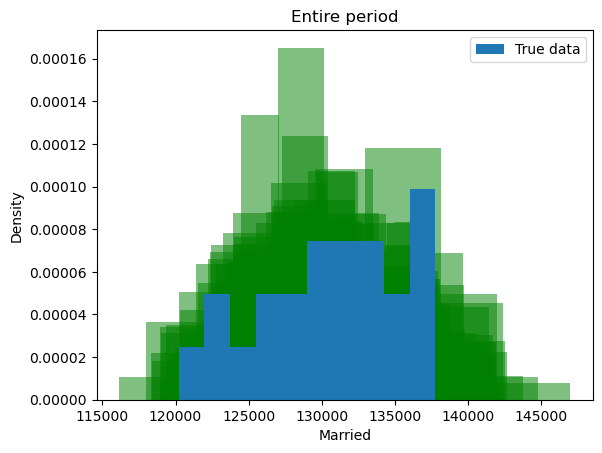

In [110]:

for i in range(R):
    plt.hist(fit_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)

plt.hist(df['Married'], density=True, label= 'True data')
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

# Analiza

In [111]:
az.summary(fit_1)

arviz - WARNING - Shape validation failed: input_shape: (1, 30), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.221,0.035,0.163,0.269,0.012,0.009,6.0,16.0,NaN
beta,123947.033,1026.946,122354.000,125460.000,407.745,302.725,5.0,16.0,NaN
sigma,4704.026,133.641,4468.450,4912.620,20.527,14.699,44.0,35.0,NaN
y_sim[0],131855.567,4021.559,125061.000,139752.000,1040.499,786.965,19.0,13.0,NaN
y_sim[1],132341.200,4640.310,125485.000,140172.000,835.546,599.915,31.0,26.0,NaN
y_sim[2],131322.600,3983.033,124210.000,139169.000,598.336,425.904,44.0,35.0,NaN
y_sim[3],132698.433,5084.583,123730.000,141968.000,1800.365,1322.741,7.0,20.0,NaN
y_sim[4],132610.100,5731.564,125000.000,144785.000,970.423,695.116,41.0,35.0,NaN
y_sim[5],132601.333,5886.548,121790.000,141445.000,884.285,629.446,24.0,35.0,NaN
y_sim[6],131377.567,5415.285,122444.000,141450.000,813.491,579.054,44.0,22.0,NaN


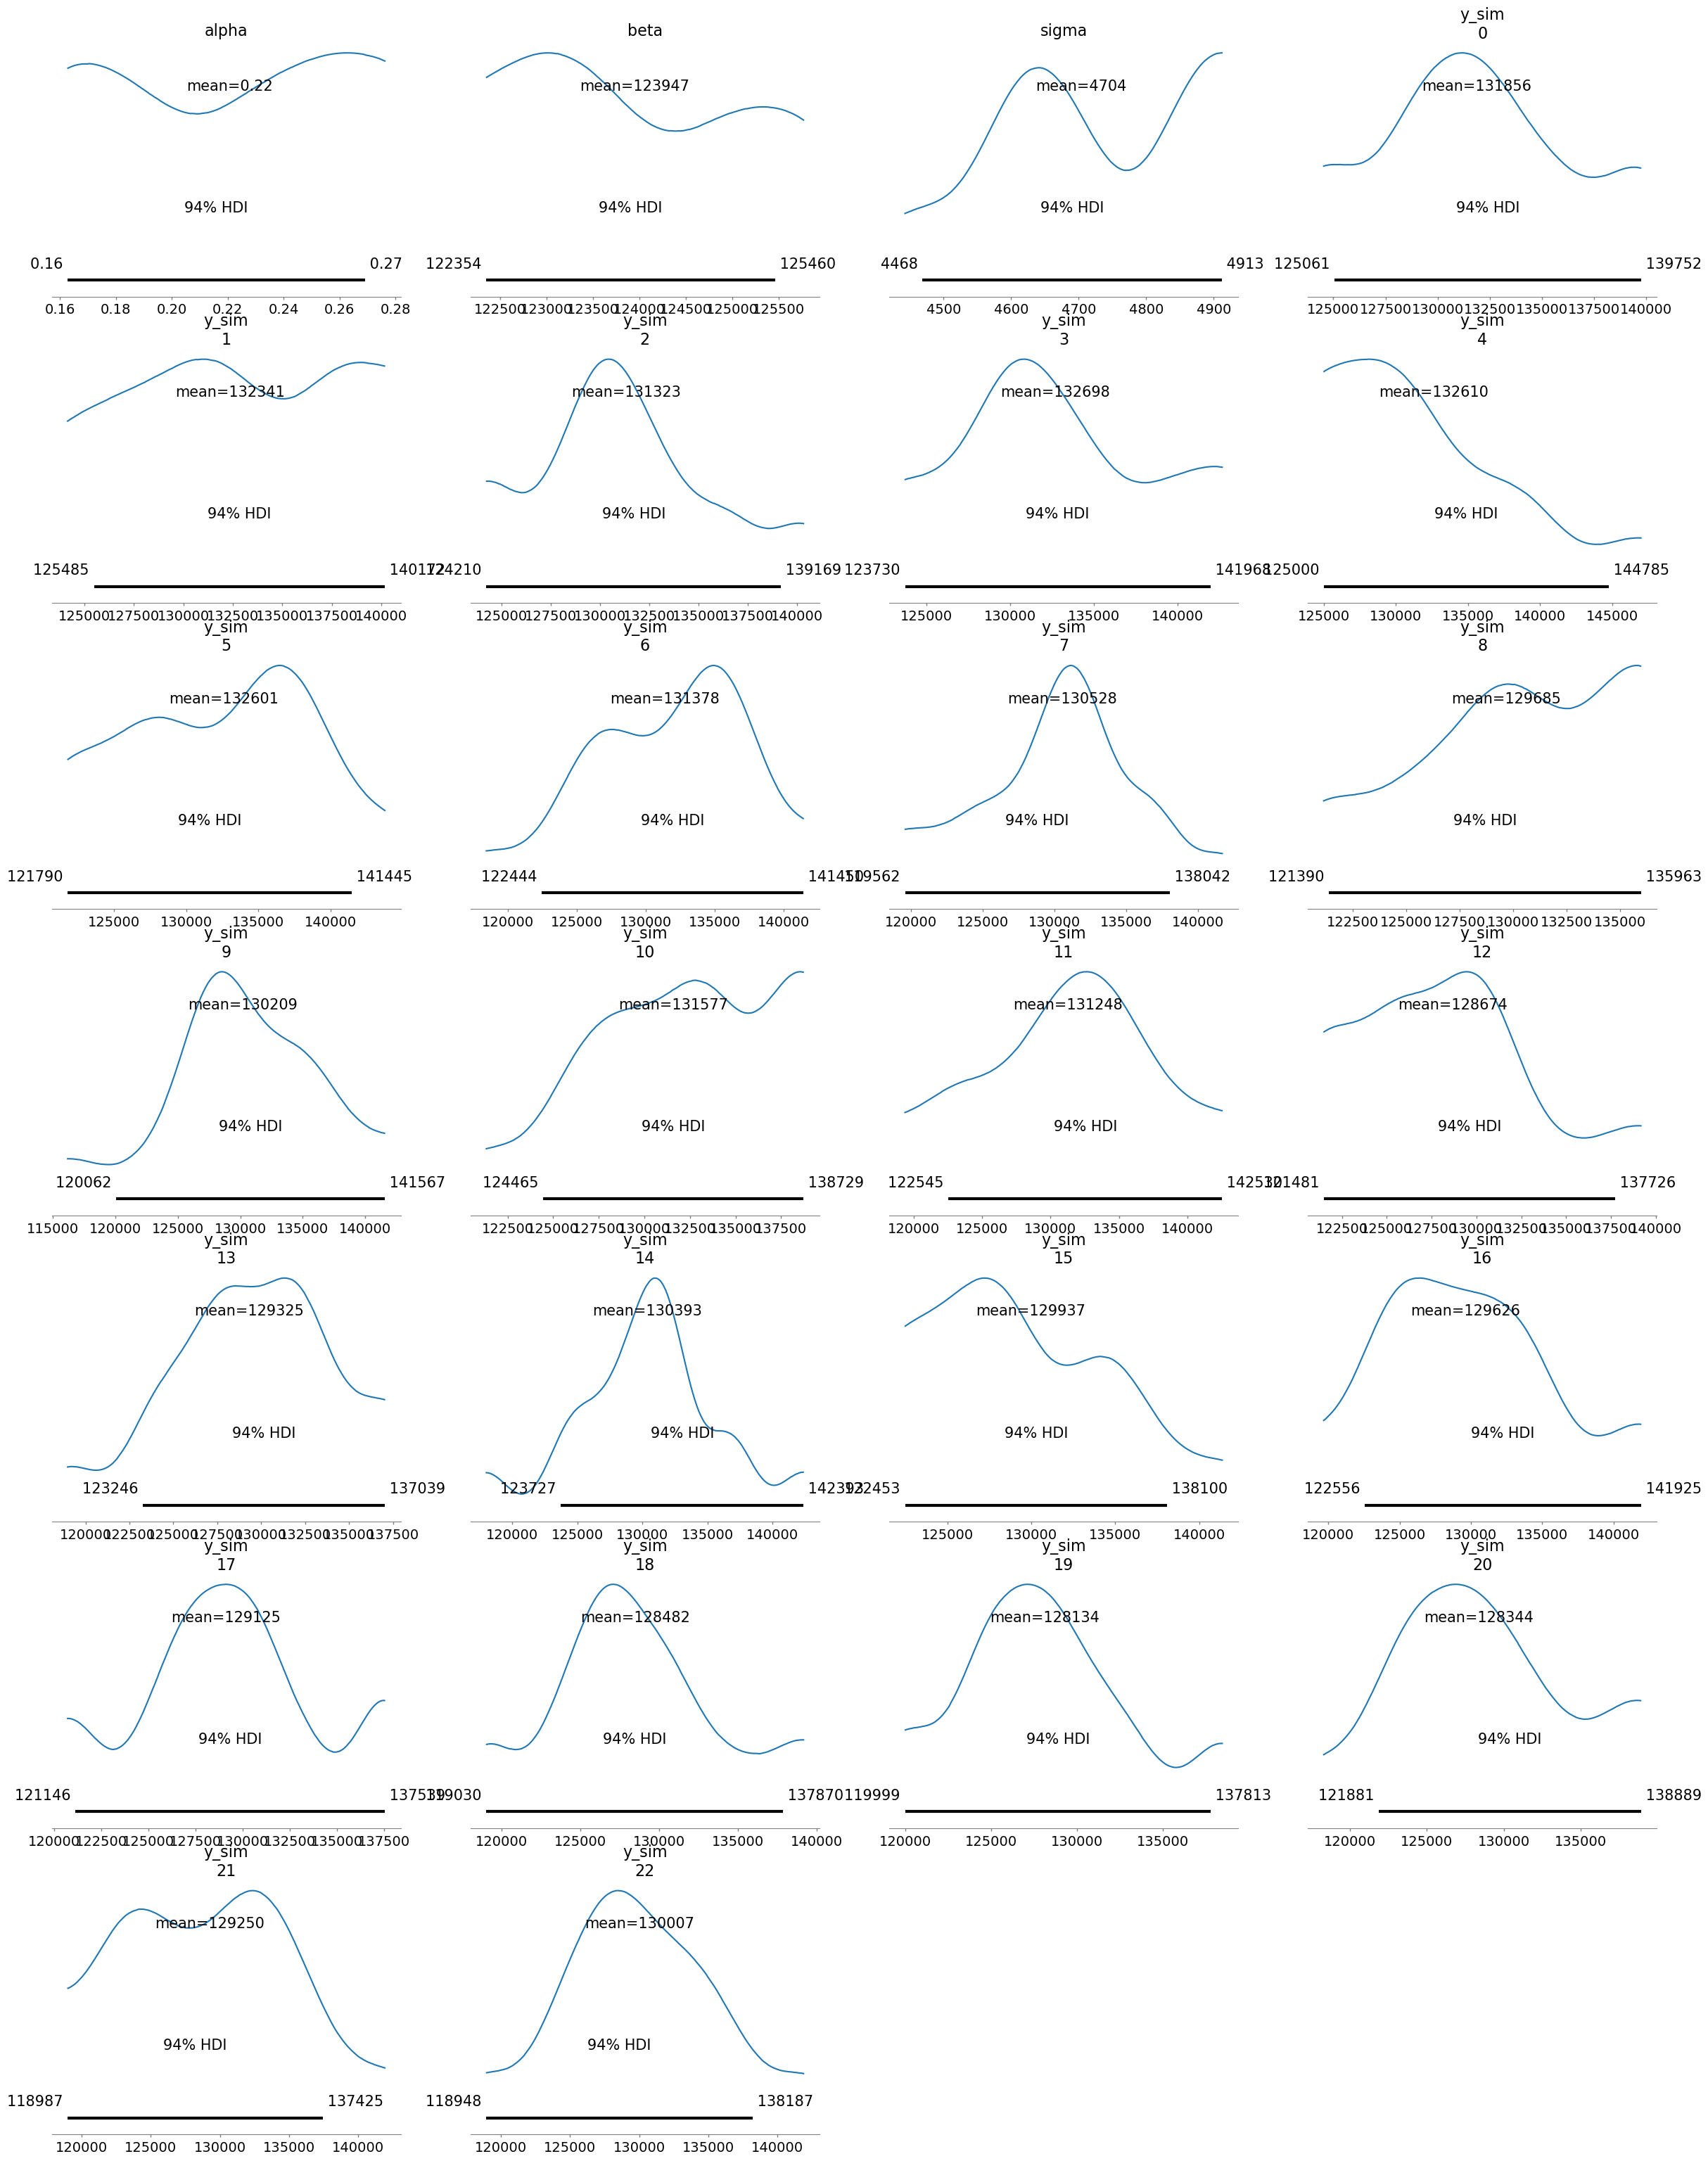

In [112]:
az.plot_posterior(fit_1)
plt.show()

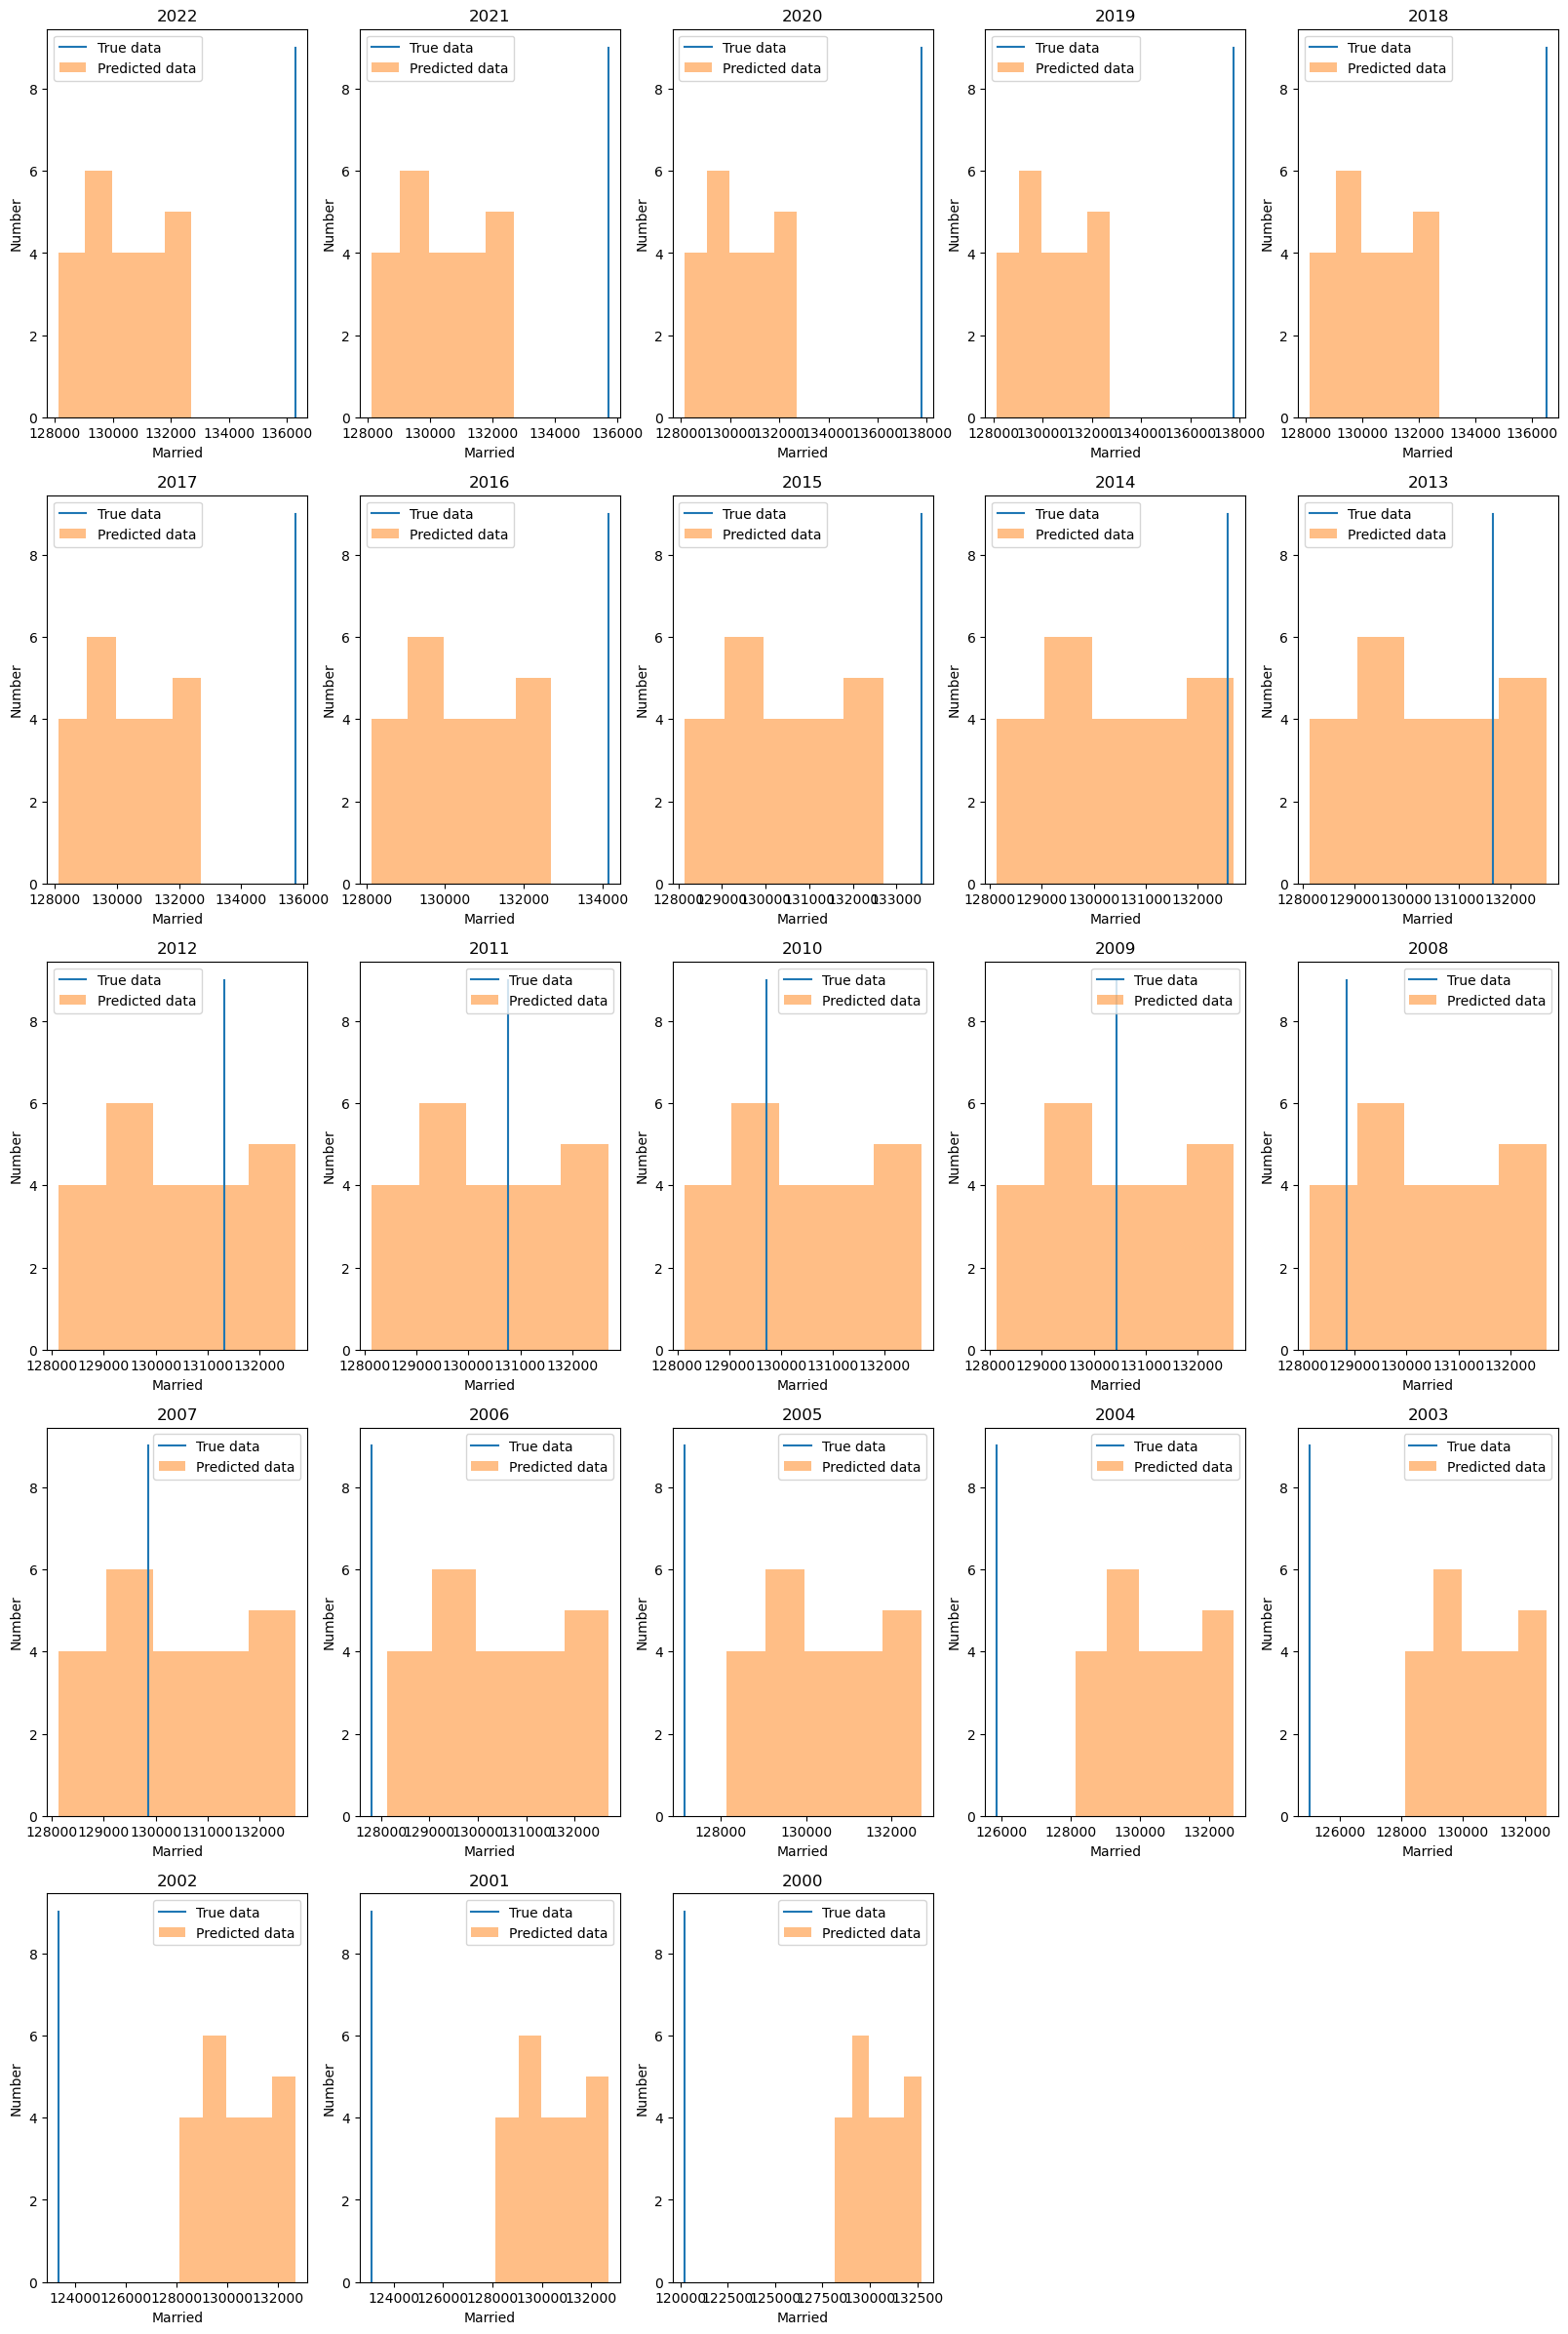

In [113]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_1.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

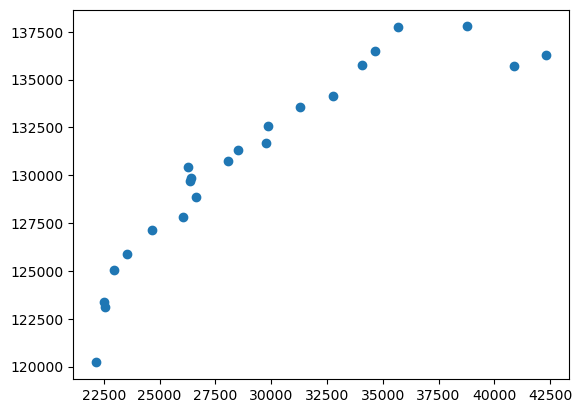

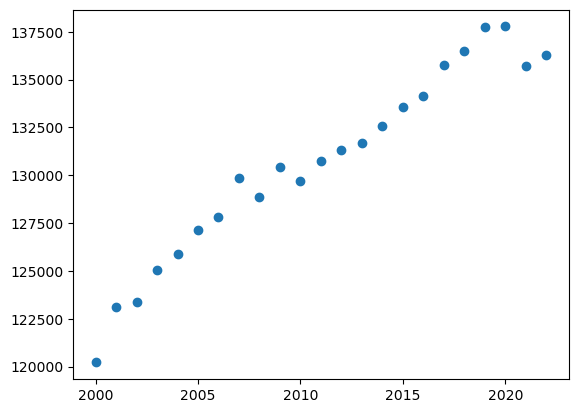

In [114]:
plt.scatter(df['Income'], df['Married'])

# for i in range(24):
#     plt.plot(df['Income'].values, fit_1.alpha[i] + fit_1.theta[i]*df['Income'])
plt.show()

plt.scatter(df['Year'], df['Married'])
# for i in range(24):
#     plt.plot(df['Year'].values, fit_1.alpha[i] + fit_1.theta[i]*df['Income'])
plt.show()

# Income i Household na ilość małżeństw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


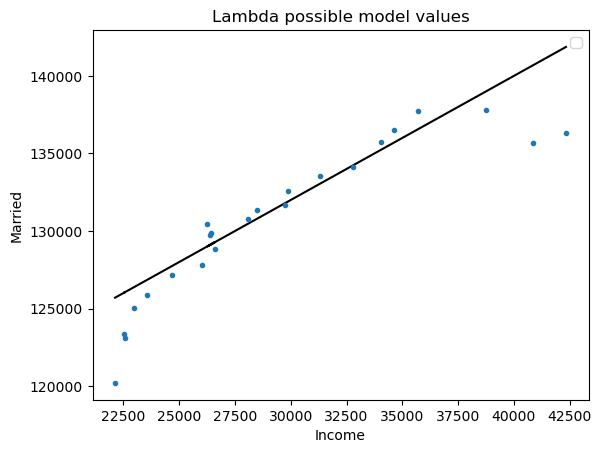

In [115]:
from numpy import random
alpha = 0.8
beta = 108000

sim = random.normal(alpha*df['Income'] + beta, 1500, 23)


plt.plot(df['Income'], alpha*df['Income'] + beta, color='black')

plt.plot(df['Income'], df['Married'],'.')
plt.title('Lambda possible model values')
plt.xlabel('Income')
plt.ylabel('Married')
plt.legend()
plt.show()

In [116]:
model = CmdStanModel(stan_file='model_prior.stan')
data = {'N': N, 'income': df['Income']}
gen_2 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True)

16:16:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


16:16:41 - cmdstanpy - INFO - CmdStan done processing.


In [117]:
gen_2.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.864351,108451.0,1521.960,144322.0,143956.0,143692.0,137280.0,136841.0,...,132042.0,131503.0,130822.0,130447.0,126881.0,133230.0,129066.0,127324.0,128463.0,125166.0
1,0.0,0.0,0.807157,103595.0,1859.770,137222.0,137757.0,133021.0,132534.0,133949.0,...,124008.0,129319.0,125458.0,121811.0,124138.0,121838.0,122612.0,124127.0,122676.0,123540.0
2,0.0,0.0,0.753695,108447.0,754.273,140756.0,139808.0,136065.0,133766.0,133458.0,...,128807.0,128149.0,127498.0,129351.0,126326.0,126495.0,126466.0,125154.0,125321.0,123931.0
3,0.0,0.0,0.746259,107623.0,378.525,138822.0,137769.0,136210.0,133611.0,133838.0,...,127463.0,128055.0,127395.0,126494.0,125959.0,124478.0,125624.0,125096.0,124975.0,123373.0
4,0.0,0.0,0.853654,109772.0,1232.020,145606.0,144540.0,145398.0,138676.0,141471.0,...,131913.0,130887.0,132175.0,133509.0,130958.0,130095.0,129478.0,128347.0,130313.0,128422.0
5,0.0,0.0,1.011060,105844.0,574.466,148726.0,147107.0,145544.0,143162.0,141121.0,...,131155.0,132034.0,131998.0,132299.0,130268.0,129115.0,129303.0,128261.0,128395.0,127439.0
6,0.0,0.0,0.931000,110408.0,1158.140,148795.0,148366.0,146429.0,144076.0,143158.0,...,134136.0,135015.0,134717.0,136618.0,132039.0,131023.0,131466.0,130574.0,130741.0,129990.0
7,0.0,0.0,0.755551,111994.0,1046.120,143453.0,142836.0,141672.0,139535.0,138002.0,...,133745.0,134113.0,132477.0,132732.0,129206.0,128709.0,130055.0,130681.0,129431.0,128800.0
8,0.0,0.0,0.728586,108984.0,1037.630,140021.0,138199.0,138720.0,133947.0,134794.0,...,127801.0,127615.0,127653.0,127582.0,127770.0,125771.0,124914.0,125796.0,126826.0,125522.0
9,0.0,0.0,0.537287,107243.0,446.255,130364.0,128492.0,127872.0,126480.0,125349.0,...,122254.0,120502.0,121544.0,121394.0,120657.0,119778.0,119293.0,119962.0,118427.0,119239.0


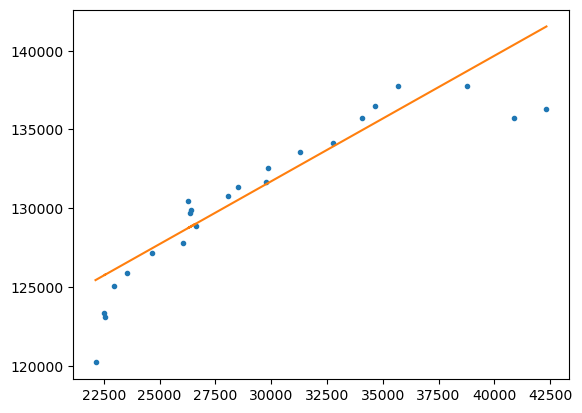

In [118]:
alpha = np.mean(gen_2.alpha)
beta = np.mean(gen_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

In [119]:
post_model = CmdStanModel(stan_file='model.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income']}
fit_2 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

16:16:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


16:16:42 - cmdstanpy - INFO - CmdStan done processing.


In [120]:
fit_2.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22],log_lik[23]
0,-4844.00,0.990053,0.140468,2.0,7.0,0.0,4845.14,0.195653,124738.0,4649.10,...,-9.37083,-9.39082,-9.36342,-9.45859,-9.49917,-9.64123,-9.77109,-10.13520,-10.2118,-11.1780
1,-4844.49,0.978986,0.140468,5.0,31.0,0.0,4844.69,0.252016,122941.0,4802.67,...,-9.41284,-9.40945,-9.39735,-9.45844,-9.48395,-9.59038,-9.69188,-9.99299,-10.0589,-10.8916
2,-4845.02,0.841047,0.140468,4.0,31.0,0.0,4847.14,0.256163,123200.0,4776.53,...,-9.39626,-9.41996,-9.39066,-9.48398,-9.51427,-9.63671,-9.74985,-10.07800,-10.1490,-11.0331
3,-4844.44,0.985141,0.140468,2.0,7.0,0.0,4845.52,0.257866,122921.0,4784.36,...,-9.40435,-9.41086,-9.39240,-9.46537,-9.49216,-9.60386,-9.70920,-10.01980,-10.0877,-10.9395
4,-4844.66,0.972099,0.140468,5.0,31.0,0.0,4845.32,0.234717,123718.0,4899.63,...,-9.42244,-9.44144,-9.41592,-9.50131,-9.53245,-9.65172,-9.76172,-10.07740,-10.1451,-10.9926
5,-4844.76,0.889400,0.140468,5.0,31.0,0.0,4846.00,0.244049,123063.0,4750.24,...,-9.40582,-9.39581,-9.38760,-9.44262,-9.46843,-9.57517,-9.67764,-9.98208,-10.0487,-10.8941
6,-4845.21,0.991983,0.140468,5.0,31.0,0.0,4846.34,0.175453,125336.0,4821.54,...,-9.40519,-9.42821,-9.40005,-9.49469,-9.53661,-9.67663,-9.80340,-10.15320,-10.2260,-11.1449
7,-4844.78,0.981528,0.140468,2.0,7.0,0.0,4845.93,0.183026,125225.0,4783.29,...,-9.39554,-9.42546,-9.39271,-9.49638,-9.53940,-9.68387,-9.81404,-10.17300,-10.2477,-11.1875
8,-4844.15,0.997722,0.140468,4.0,15.0,0.0,4845.18,0.191856,124818.0,4632.05,...,-9.36776,-9.38627,-9.35971,-9.45381,-9.49491,-9.63801,-9.76894,-10.13560,-10.2126,-11.1859
9,-4844.08,0.947756,0.140468,2.0,3.0,0.0,4844.51,0.195057,124797.0,4636.82,...,-9.36713,-9.39054,-9.36091,-9.46057,-9.50224,-9.64730,-9.77945,-10.14880,-10.2264,-11.2038


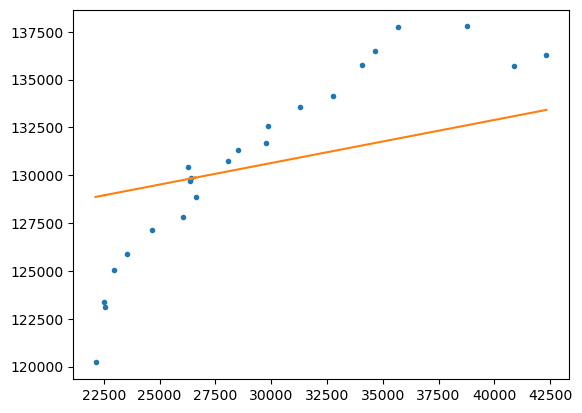

In [121]:
alpha = np.mean(fit_2.alpha)
beta = np.mean(fit_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

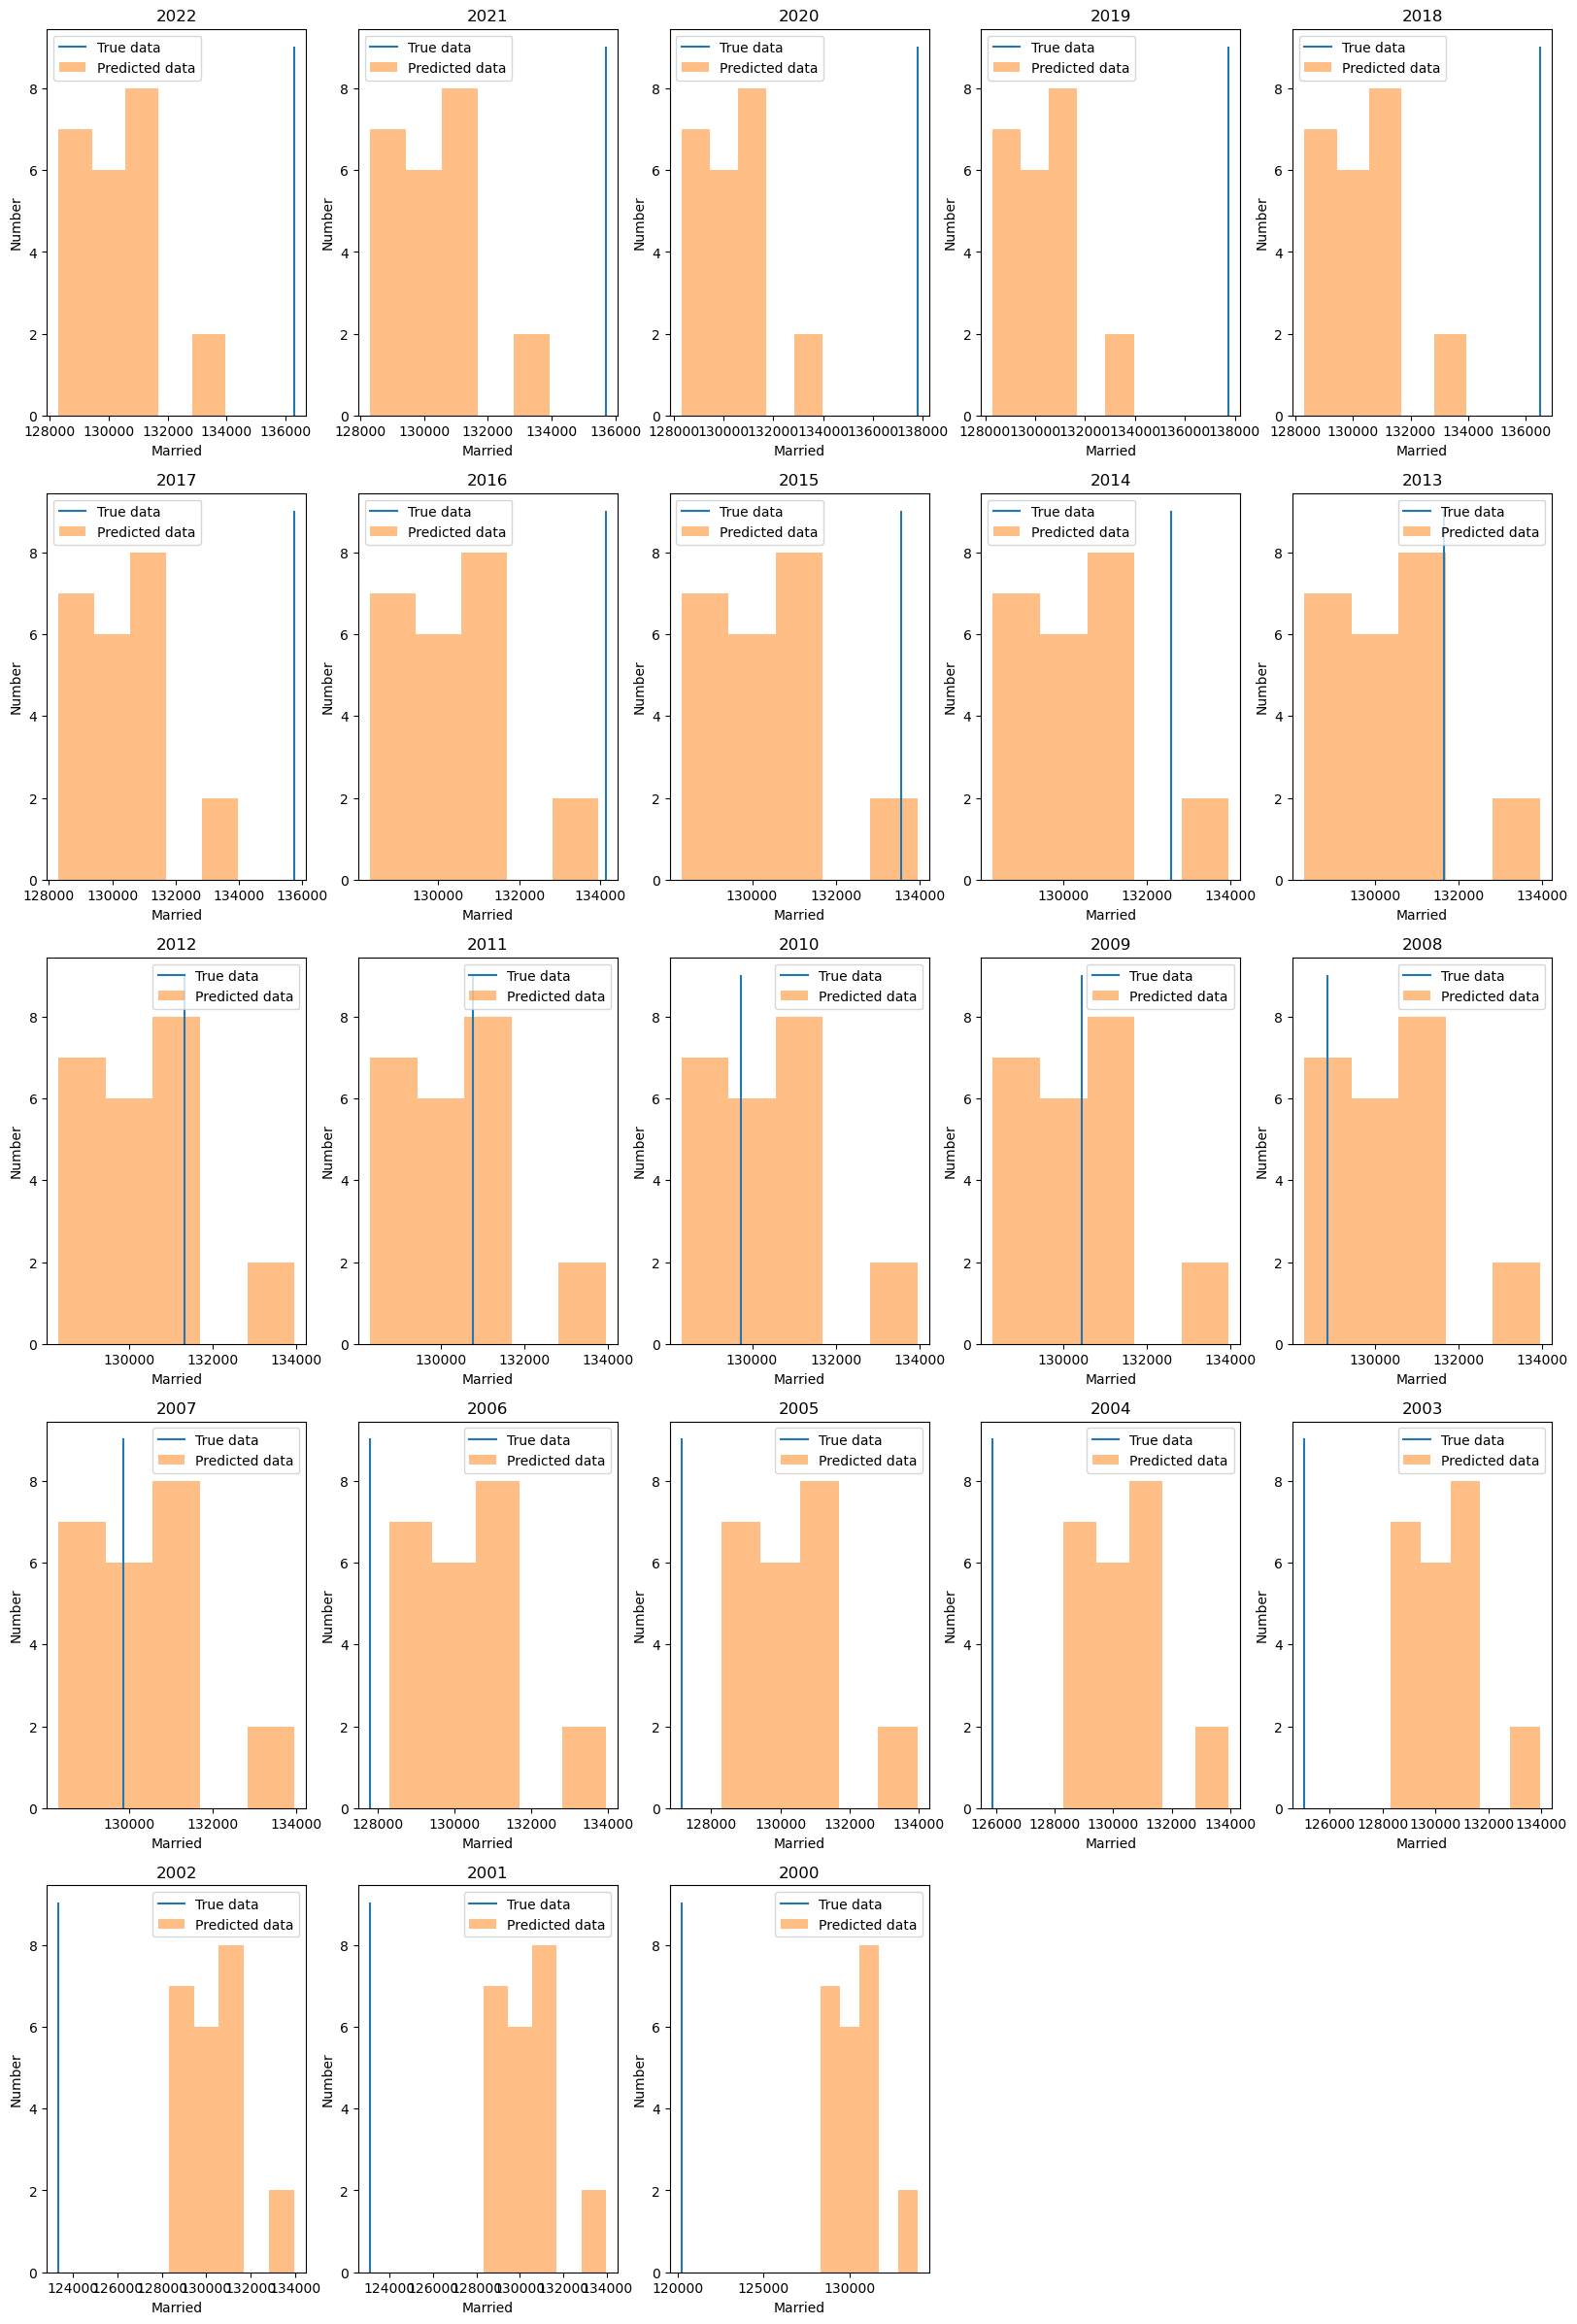

In [122]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_2.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

# Trimodel

In [123]:
model = CmdStanModel(stan_file='triparam_model.stan')
data = {'N': N, 'income': df['Income'], 'mean_age': df['Mean age'], 'household': df['Household']}
gen_tri = model.sample(
                    data=data,
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1,
                    fixed_param=True)

16:16:45 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model.exe
16:17:04 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model.exe
16:17:04 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
16:17:04 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/triparam_model.hpp C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/triparam_model.stan
Warning in 'C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/triparam_model.stan', line 11, column 26: fabs
    is deprecated and will be removed in Stan 2.33.0. Use abs instead. This
    can be automatically changed using the canonicalize flag for stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-functio


16:17:05 - cmdstanpy - INFO - CmdStan done processing.


In [124]:
gen_tri.draws_pd()

,lp__,accept_stat__,alpha_1,alpha_2,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.125956,0.730000,39107.9,0.595086,129554.0,128295.0,127995.0,128474.0,...,121341.0,121008.0,120470.0,119329.0,118741.0,117902.0,117448.0,116056.0,115258.0,112755.0
1,0.0,0.0,0.120126,0.741640,40712.7,0.421916,132933.0,131642.0,131321.0,131784.0,...,124464.0,124127.0,123578.0,122417.0,121809.0,120948.0,120482.0,119065.0,118253.0,115708.0
2,0.0,0.0,0.165777,0.702274,41699.8,1.044820,126822.0,125678.0,125481.0,126079.0,...,119639.0,119301.0,118793.0,117712.0,117207.0,116449.0,116040.0,114720.0,113950.0,111562.0
3,0.0,0.0,0.163359,0.673185,39081.4,0.557434,120490.0,119398.0,119221.0,119806.0,...,113674.0,113350.0,112864.0,111829.0,111353.0,110631.0,110240.0,108979.0,108239.0,105952.0
4,0.0,0.0,0.184545,0.823893,35869.7,1.766330,136154.0,134796.0,134548.0,135219.0,...,127566.0,127177.0,126578.0,125305.0,124697.0,123798.0,123314.0,121761.0,120858.0,118051.0
5,0.0,0.0,0.135129,0.811367,37414.9,1.260730,138146.0,136742.0,136397.0,136915.0,...,128942.0,128574.0,127973.0,126706.0,126044.0,125107.0,124601.0,123049.0,122164.0,119379.0
6,0.0,0.0,0.110791,0.701372,40169.7,1.089400,127501.0,126276.0,125970.0,126397.0,...,119445.0,119132.0,118611.0,117510.0,116930.0,116113.0,115672.0,114331.0,113563.0,111155.0
7,0.0,0.0,0.148161,0.732828,38951.5,0.597751,128829.0,127596.0,127341.0,127889.0,...,120932.0,120591.0,120055.0,118917.0,118358.0,117538.0,117097.0,115709.0,114906.0,112405.0
8,0.0,0.0,0.191000,0.817532,41381.2,0.470027,140558.0,139222.0,138991.0,139679.0,...,132163.0,131772.0,131180.0,129920.0,129331.0,128448.0,127968.0,126432.0,125535.0,122754.0
9,0.0,0.0,0.160480,0.750449,38756.1,0.610274,130423.0,129176.0,128931.0,129519.0,...,122480.0,122126.0,121577.0,120416.0,119855.0,119027.0,118578.0,117162.0,116340.0,113780.0


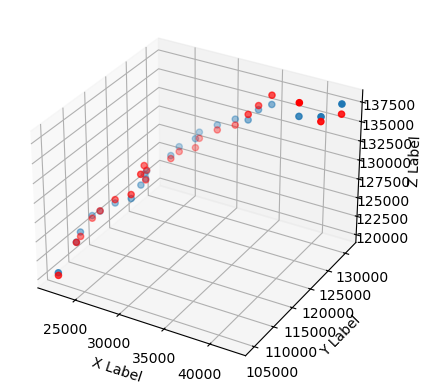

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = df['Income']
y = df['Household']
z = df['Married']


# Compute coefficients of the linear regression line manually
X = np.column_stack((np.ones_like(x), x, y))  # Add a column of ones for the intercept
coefficients = np.linalg.lstsq(X, z, rcond=None)[0]

# Extract coefficients
intercept, slope_x, slope_y = coefficients

# Define points for the line
z_line = intercept + slope_x * df['Income'] + slope_y * df['Household']

# # Plotting the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x, y, z_line)

# # # Plotting the linear regression line
# ax.plot_surface(x_line, y_line, z_line, alpha=0.5)

# Labeling the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

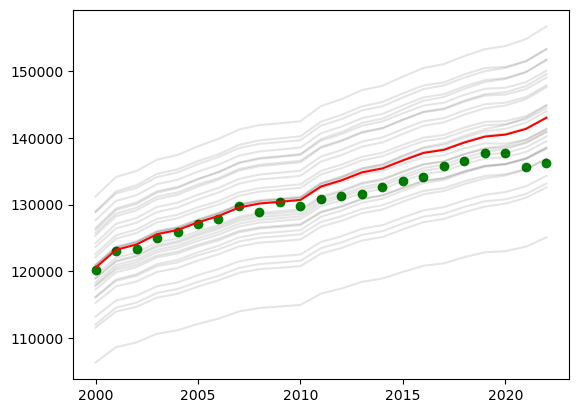

In [132]:
for i in range(len(gen_tri.y_sim)):
    plt.plot(df['Year'], gen_tri.alpha_1[i]*df['Income'] + gen_tri.alpha_2[i]*df['Household'] + gen_tri.beta[i], color='black', alpha = 0.1)
plt.plot(df['Year'], gen_tri.alpha_1.mean()*df['Income'] + gen_tri.alpha_2.mean()*df['Household'] + gen_tri.beta.mean(), color='red')   
plt.scatter(df['Year'], df['Married'], color='green')
plt.show()

In [127]:
post_model = CmdStanModel(stan_file='triparam_model_posterior.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income'], 'household': df['Household']}
fit_tri = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

16:17:06 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model_posterior.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model_posterior.exe
16:17:26 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model_posterior.exe
16:17:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                     


16:17:29 - cmdstanpy - INFO - CmdStan done processing.


In [128]:
fit_tri.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha_1,alpha_2,beta,...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,-115944.0,0.956855,0.000188,9.0,587.0,0.0,115946.0,0.075686,0.067829,124779.0,...,130788.0,130272.0,130536.0,130205.0,131000.0,130516.0,130309.0,130353.0,129555.0,130603.0
1,-115944.0,0.997116,0.000188,9.0,543.0,0.0,115944.0,0.082015,0.070729,124616.0,...,130535.0,130550.0,130793.0,130400.0,130902.0,130661.0,131027.0,130321.0,130796.0,130843.0
2,-115945.0,0.925723,0.000188,5.0,59.0,0.0,115947.0,0.079442,0.071684,124443.0,...,129767.0,131208.0,130357.0,130927.0,130464.0,130624.0,130928.0,129823.0,130108.0,130516.0
3,-115945.0,0.913271,0.000188,7.0,191.0,0.0,115949.0,0.076702,0.066884,124915.0,...,131068.0,130392.0,130726.0,130368.0,130542.0,130346.0,130312.0,130517.0,130295.0,130291.0
4,-115947.0,0.973814,0.000188,6.0,127.0,0.0,115948.0,0.071924,0.066012,124877.0,...,131077.0,131350.0,130993.0,130568.0,130544.0,130369.0,131187.0,130652.0,130562.0,130334.0
5,-115945.0,0.959190,0.000188,7.0,191.0,0.0,115948.0,0.075696,0.067666,124810.0,...,130865.0,130954.0,130956.0,130735.0,130370.0,130782.0,130492.0,130559.0,129828.0,130010.0
6,-115945.0,0.947786,0.000188,7.0,191.0,0.0,115949.0,0.084976,0.070527,124717.0,...,130973.0,130923.0,130688.0,130273.0,130464.0,130570.0,130634.0,130555.0,130128.0,130145.0
7,-115943.0,0.999668,0.000188,7.0,251.0,0.0,115947.0,0.081358,0.072776,124358.0,...,131128.0,130861.0,130269.0,130728.0,130926.0,130841.0,130045.0,130642.0,130295.0,129516.0
8,-115943.0,0.908923,0.000188,7.0,211.0,0.0,115944.0,0.083407,0.072523,124426.0,...,131216.0,130104.0,130762.0,130527.0,130533.0,130120.0,129686.0,130607.0,130384.0,129798.0
9,-115945.0,0.998400,0.000188,8.0,319.0,0.0,115946.0,0.076198,0.069079,124637.0,...,130567.0,130350.0,130946.0,129933.0,130778.0,130357.0,130071.0,130334.0,130514.0,130620.0


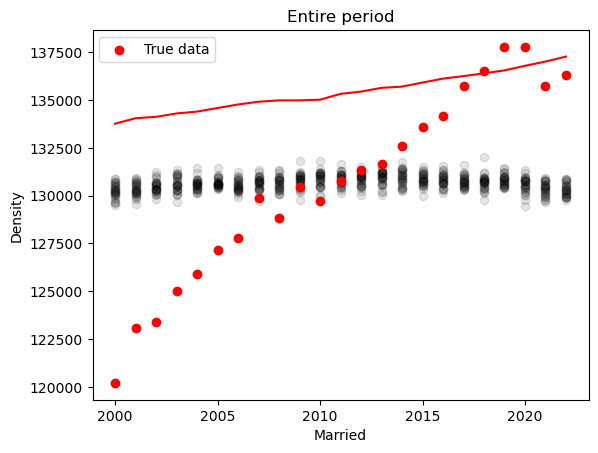

In [130]:
for i in range(len(fit_tri.y_sim)):
    plt.scatter(df['Year'], fit_tri.y_sim[i], alpha = 0.1, color="black")
plt.scatter(df['Year'], df['Married'], label= 'True data', color="red")
plt.plot(df['Year'], fit_tri.alpha_1.mean()*df['Income'] + fit_tri.alpha_2.mean()*df['Household'] + fit_tri.beta.mean(), color='red')   
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

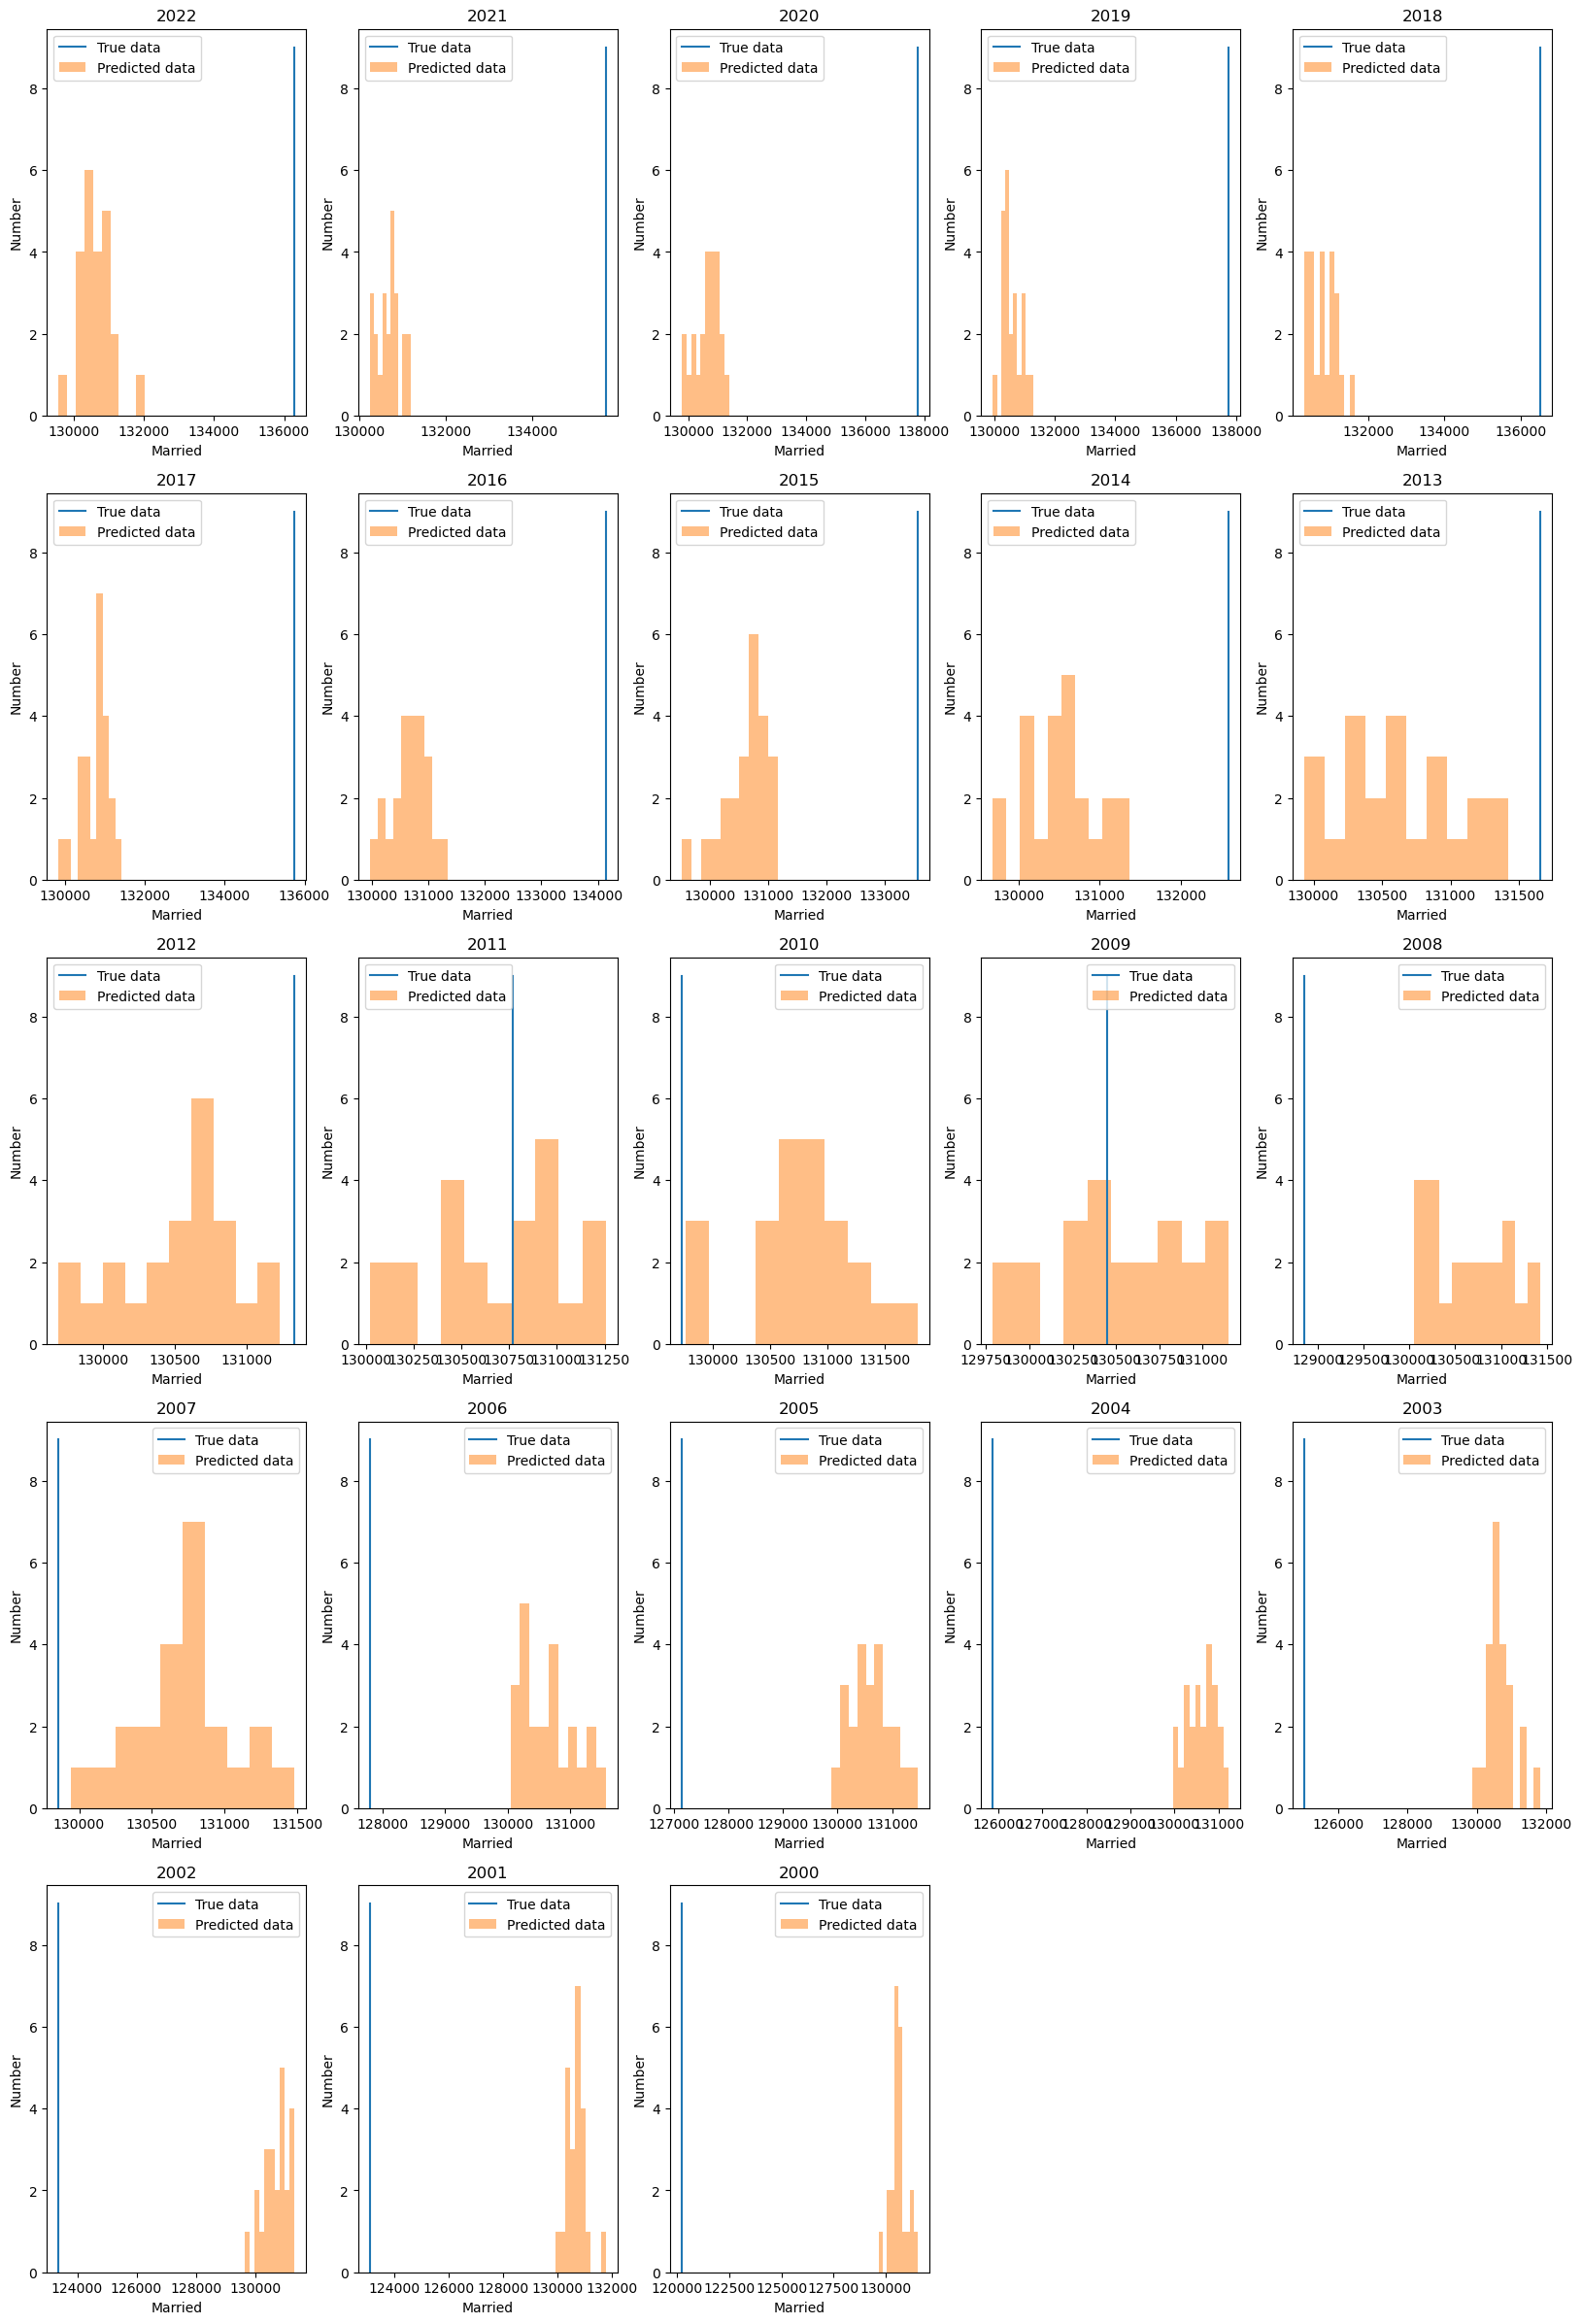

In [131]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_tri.y_sim[i], bins=10, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()